# XAI - Explaining Models

## Imports

In [16]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
import pickle
import shap

In [17]:
model_name = "xgb"
with open("models/" + model_name + ".pkl", "rb") as file:
    model = pickle.load(file)

In [18]:
data = pd.read_csv('data/high_diamond_ranked_10min.csv')

train_val, test = train_test_split(data, test_size=0.2, random_state=42)
train, val = train_test_split(train_val, test_size=0.3, random_state=42)

train_X = train.drop(columns=['gameId', 'blueWins'])
train_y = pd.DataFrame(train['blueWins'])

val_X = val.drop(columns=['gameId', 'blueWins'])
val_y = pd.DataFrame(val['blueWins'])

test_X = test.drop(columns=['gameId', 'blueWins'])
test_y = pd.DataFrame(test['blueWins'])

scaler = preprocessing.StandardScaler()
train_X_scaled = pd.DataFrame(scaler.fit_transform(train_X), columns=train_X.columns)
val_X_scaled = pd.DataFrame(scaler.transform(val_X), columns=val_X.columns)
test_X_scaled = pd.DataFrame(scaler.transform(test_X), columns=test_X.columns)

## Extrinsic Models

### Shapley Values

In [20]:
# print the JS visualization code to the notebook
shap.initjs()

# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(model.predict_proba, train_X_scaled, link="logit")
shap_values = explainer.shap_values(val_X_scaled, nsamples=100)

# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], val_X_scaled.iloc[0,:], link="logit")

[22:40:39] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[22:40:40] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


TypeError: Tree.shap_values() got an unexpected keyword argument 'nsamples'

### Tree Models

[22:41:54] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


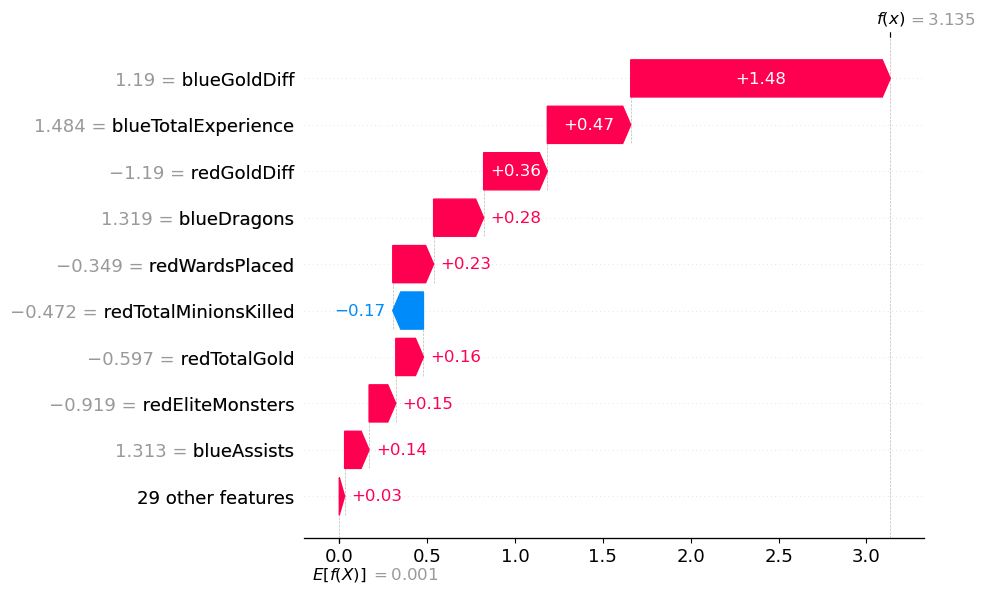

In [22]:
# print the JS visualization code to the notebook
shap.initjs()

# use Kernel SHAP to explain test set predictions
explainer = shap.Explainer(model)
shap_values = explainer(train_X_scaled)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [23]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [24]:
# visualize all the training set predictions
shap.plots.force(shap_values[:500])

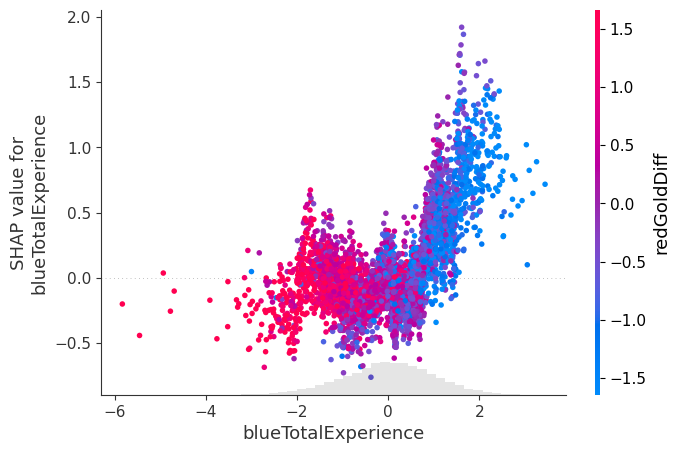

In [27]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "blueTotalExperience"], color=shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


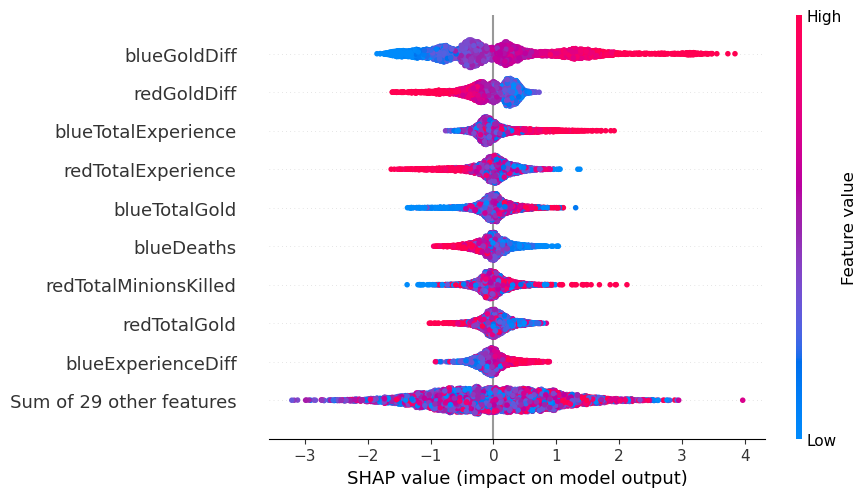

In [28]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

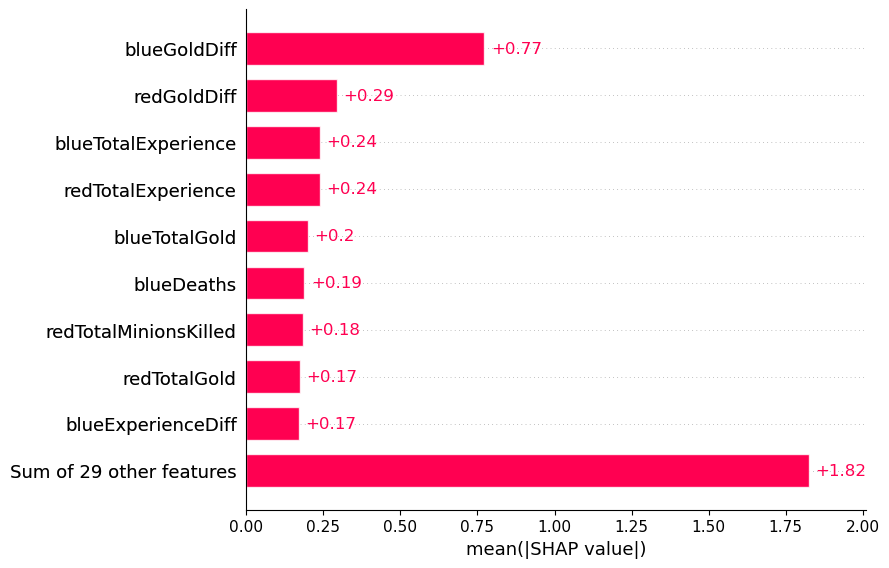

In [29]:
shap.plots.bar(shap_values)

## Surrogate Models

### Decision Trees

### LIME